In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
import ipywidgets as widgets

In [4]:
def f(o): print('hi')

In [8]:
f(1)

hi


In [9]:
w = widgets.Button(description='Click me')

In [10]:
w

Button(description='Click me', style=ButtonStyle())

In [11]:
w.on_click(f)

In [22]:
from time import sleep

In [23]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb: cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb: cb.after_calc(i, val=res)
    return res

In [47]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, epoch, **kwargs): print(f'epoch: {epoch}')
    def after_calc(self, epoch, val, **kwargs):
        print(f"epoch: {epoch}; Value: {val}")
        if val > 10: return True

In [48]:
def slow_calculation(cb=None): 
    res = 0
    for i in range(5):
        if cb and hasattr(cb, 'before_calc'): cb.before_calc(i)
        res += i*i
        sleep(0.2)
        if cb and hasattr(cb, 'after_calc'):
            if cb.after_calc(i, res):
                print('stopping early')
                break
    return res

In [49]:
slow_calculation(PrintStepCallback())

epoch: 0
epoch: 0; Value: 0
epoch: 1
epoch: 1; Value: 1
epoch: 2
epoch: 2; Value: 5
epoch: 3
epoch: 3; Value: 14
stopping early


14

In [52]:
class SlowCalculator():
    def __init__(self, cb=None): self.cb, self.res = cb, 0
        
    def calc(self):
        for i in range(5):
            self.callback('before_calc', i)
            self.res += i*i
            sleep(0.5)
            if self.callback('after_calc', i):
                print('Stopping early')
                break
                
    def callback(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb, cb_name, None)
        if cb: return cb(self, *args)

In [53]:
class ModyfyingCallback():
    def after_calc(self, calc, epoch):
        print(f"After {epoch}: {calc.res}")
        if calc.res > 10: return True
        if calc.res < 3: calc.res = calc.res * 2

In [54]:
calculator = SlowCalculator(ModyfyingCallback())

In [55]:
calculator.res

0

In [56]:
calculator.calc()
calculator.res

After 0: 0
After 1: 1
After 2: 6
After 3: 15
Stopping early


15

# dunder thingies

In [64]:
class SloppyAdder():
    def __init__(self, o): self.o = o
    def __repr__(self): return str(self.o)
    def __add__(self, b): return SloppyAdder(self.o + b.o + 0.01)

In [68]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a + b, a, b

(3.01, 1, 2)

# Variance and stuff

In [69]:
t = torch.tensor([1., 2, 4, 18])

In [70]:
m = t.mean(); m

tensor(6.2500)

In [71]:
(t-m).mean()

tensor(0.)

In [72]:
(t-m).pow(2).mean()

tensor(47.1875)

In [75]:
(t-m).pow(2).mean().sqrt()

tensor(6.8693)

In [76]:
(t-m).abs().mean()

tensor(5.8750)

In [78]:
(t-m).pow(2).mean(), (t*t).mean() - m*m

(tensor(47.1875), tensor(47.1875))

In [79]:
t 

tensor([ 1.,  2.,  4., 18.])

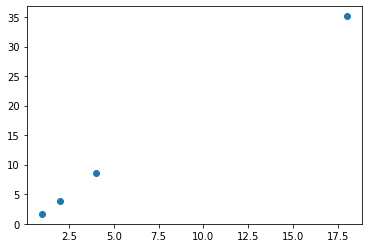

In [80]:
u = t*2
u *= torch.randn_like(t) / 10 + 0.95

plt.scatter(t, u);

In [81]:
prod = (t-t.mean()) * (u-u.mean()); prod

tensor([ 55.9585,  36.0703,   8.2739, 268.1721])

In [82]:
prod.mean()

tensor(92.1187)

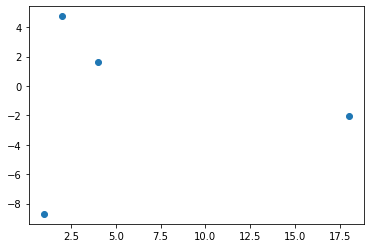

In [84]:
v = torch.randn_like(t) * 10
plt.scatter(t,v);

In [89]:
((t-t.mean()) * (v-v.mean())).mean()

tensor(-0.5801)

In [91]:
cov = ((t*v).mean() - (t.mean() * v.mean())).mean(); cov

tensor(-0.5801)

In [92]:
cov / (t.std() * v.std())

tensor(-0.0126)

In [93]:
def log_softmax(x): return x - x.exp().sum(-1, keepdim=True).log()